# Pre processamento dos dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.shape

(1143, 13)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Visualizar dados

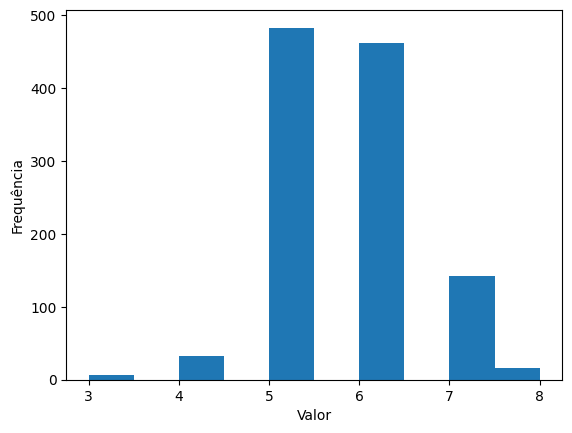

In [ ]:
# coluna classe
plt.hist(df['quality']);
plt.xlabel("Valor")
plt.ylabel("Frequência");

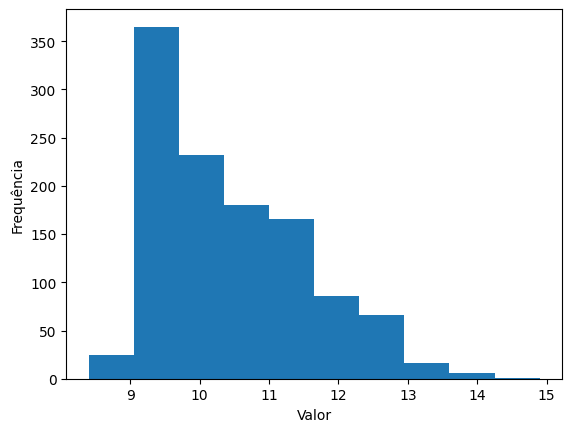

In [ ]:
plt.hist(df['alcohol']);
plt.xlabel("Valor")
plt.ylabel("Frequência");

# Divisao previsores e classe

In [ ]:
X_wine = df.iloc[:, 0:10].values

In [ ]:
y_wine = df.iloc[:, 11].values

In [ ]:
type(X_wine)

numpy.ndarray

In [ ]:
type(y_wine)

numpy.ndarray

In [ ]:
X_wine

array([[7.4    , 0.7    , 0.     , ..., 0.9978 , 3.51   , 0.56   ],
       [7.8    , 0.88   , 0.     , ..., 0.9968 , 3.2    , 0.68   ],
       [7.8    , 0.76   , 0.04   , ..., 0.997  , 3.26   , 0.65   ],
       ...,
       [6.2    , 0.6    , 0.08   , ..., 0.9949 , 3.45   , 0.58   ],
       [5.9    , 0.55   , 0.1    , ..., 0.99512, 3.52   , 0.76   ],
       [5.9    , 0.645  , 0.12   , ..., 0.99547, 3.57   , 0.71   ]])

In [ ]:
y_wine

array([5, 5, 5, ..., 5, 6, 5])

# Divisao treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_wine_treinamento, X_wine_teste, y_wine_treinamento, y_wine_teste = train_test_split(X_wine, y_wine, test_size = 0.25, random_state = 0)

# Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_wine= LogisticRegression()
logistic_wine.fit(X_wine, y_wine)

In [ ]:
logistic_wine.intercept_ # parametro B0

array([-0.02277364, -0.01250025,  0.1181439 ,  0.08147272, -0.11722362,
       -0.0471191 ])

In [ ]:
logistic_wine.coef_ #  B1, B2, B3, B4

array([[-0.1244216 ,  0.06473812, -0.01360012,  0.00281305,  0.00242784,
        -0.11554883,  0.0011869 , -0.0219965 , -0.06602535, -0.03265889],
       [-0.17726555,  0.17876647, -0.07918013,  0.09036125,  0.01027808,
         0.05198118, -0.00736038, -0.0116559 ,  0.01724781, -0.01998416],
       [ 0.05328906,  0.75168774, -0.37272453, -0.0616282 ,  0.08480094,
        -0.00157477,  0.0205818 ,  0.12177609,  0.24596231, -0.60980065],
       [ 0.04879096, -0.24621665, -0.06817209, -0.06820259, -0.0124188 ,
         0.02081549, -0.0007912 ,  0.07833986,  0.43254767,  0.30382448],
       [ 0.21571463, -0.65565611,  0.44188208,  0.01468614, -0.07282434,
         0.04090818, -0.00115461, -0.11960181, -0.42738736,  0.3200023 ],
       [-0.0161075 , -0.09331956,  0.09179479,  0.02197036, -0.01226372,
         0.00341875, -0.0124625 , -0.04686174, -0.20234508,  0.03861692]])

In [ ]:
previsoes = logistic_wine.predict(X_wine_teste)
previsoes

array([5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 6, 6, 7, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6, 5, 6, 6, 6,
       6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 6, 6, 5])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_wine_teste, previsoes)

0.5559440559440559

0.5559440559440559

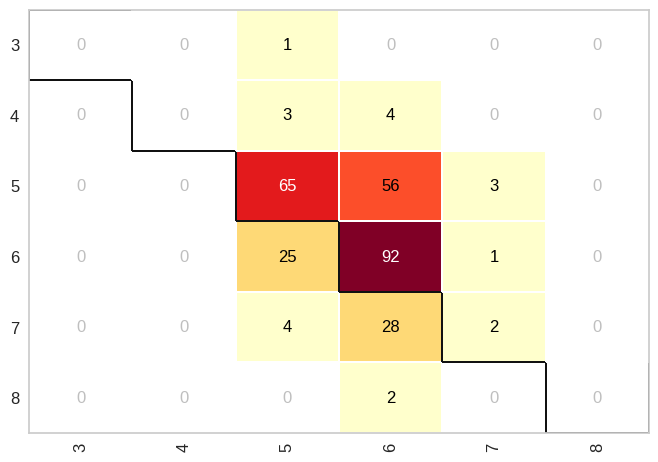

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_wine)
cm.fit(X_wine_treinamento, y_wine_treinamento)
cm.score(X_wine_teste, y_wine_teste)

**a classe 6 possui o melhor desempenho**



In [ ]:
print(classification_report(y_wine_teste, previsoes))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.66      0.52      0.59       124
           6       0.51      0.78      0.61       118
           7       0.33      0.06      0.10        34
           8       0.00      0.00      0.00         2

    accuracy                           0.56       286
   macro avg       0.25      0.23      0.22       286
weighted avg       0.54      0.56      0.52       286



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Consideração: o algoritmo não se porta bem para datasets com mais de dois valores de classe.

# Dataframe apenas com as classes 6 e 7

In [ ]:
ndf = df[df['quality'].isin([6, 7])]

In [ ]:
ndf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,16
13,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,6,19


In [ ]:
X_wine2 = ndf.iloc[:, 0:10].values
y_wine2 = ndf.iloc[:, 11].values

In [ ]:
X_wine2_treinamento, X_wine2_teste, y_wine2_treinamento, y_wine2_teste = train_test_split(X_wine2, y_wine2, test_size = 0.25, random_state = 0)

In [ ]:
logistic_wine2= LogisticRegression()
logistic_wine2.fit(X_wine2, y_wine2)

In [ ]:
logistic_wine2.intercept_ # parametro B0

array([-0.24414818])

In [ ]:
previsoes2 = logistic_wine2.predict(X_wine2_teste)
previsoes2

array([6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [ ]:
accuracy_score(y_wine2_teste, previsoes2)

0.7368421052631579

0.7368421052631579

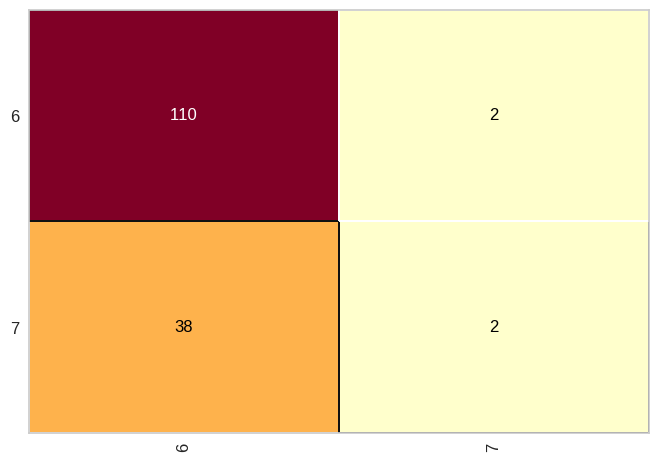

In [ ]:
cm2 = ConfusionMatrix(logistic_wine2)
cm2.fit(X_wine2_treinamento, y_wine2_treinamento)
cm2.score(X_wine2_teste, y_wine2_teste)

In [ ]:
print(classification_report(y_wine2_teste, previsoes2))

              precision    recall  f1-score   support

           6       0.74      0.98      0.85       112
           7       0.50      0.05      0.09        40

    accuracy                           0.74       152
   macro avg       0.62      0.52      0.47       152
weighted avg       0.68      0.74      0.65       152



**Consegue acertar bem mais so com 2 classes, mas ainda assim não é um valor tão safisfatório**